In [22]:
from baixa_curvas import bmf, historico
from datetime import datetime

In [23]:
data = datetime.strptime('2022-04-11', '%Y-%m-%d')

In [24]:
gera_bmf = bmf(data)

In [25]:
gera_bmf.dt_barra

'11/04/2022'

In [26]:
gera_bmf._baixa_cupom()

C:\Users\maike\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.bmf.com.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


,taxas360
1,-1.4126
2,-0.6375
3,-0.3791
7,-0.1428
14,-0.0320
...,...
10172,0.0622
10353,0.0629
10801,0.0648
12089,0.0706


In [27]:
df_pre = gera_bmf._baixa_pre()
df_pre.drop(1, inplace=True)

C:\Users\maike\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.bmf.com.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


<AxesSubplot:>

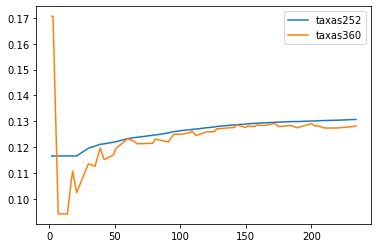

In [28]:
df_pre[:50].plot()